<b><i>Projeto em desenvolvimento através do livro "Hands-On Machine Learning"</i></b>

# Perguntas

1- Qual o objetivo?|R: Determinar se vale a pena investir em uma determinada área ou não.

2 - Qual o problema a empresa está enfrentando?|R: Os preços da habitação são estimados manualmente por especialistas, onde a equipe reúne informações sobre os distritos, e quando não conseguem obter o preço médio por abitação, realizam a estimativa através de regras complexas. Isto é caro e demorado, e as estimativas não são boas, nos casos em que a equipe consegue descobrir o preço médio real por habitação, muitas vezes percebem que suas estimativas estavam erradas em cerca de 20%.

# Enquadrando o problema

1 - É supervisionado? Não supervisionado ou  aprendizado por reforço?|R: Utilizaremos um modelo de aprendizado supervisionado, já que queremos que nosso modelo aprenda com dados já rotulados.

2- É uma tarefa de classificação? uma tarefa de regressão ou outra coisa?|R: Nosso primeiro modelo será para resolver um problema de regressão, mais especificamente uma regressão múltipla, prevendo\estipulando um valor para habitação, sendo também um problema de regressão univariado. Logo em sequência vamos utilizar esse modelo como entrada em um outro modelo de classificação, determinando se vale a pena investir na área ou não.

3 - Será utilizado o aprendizado em lote ou técnicas de aprendizado on-line?|R: Será utilizado o aprendizado em lote, pois não há fluxo contínuo de dados entrando no sistema, não há necessidade de se ajustar rapidamente ás mudanças de dados.

# Baixando os dados

In [1]:
from pathlib import Path
import tarfile
import urllib.request
import pandas as pd

In [2]:
def loading_house_data():
    #instanciar o caminho do arquivo
    path_data = Path("datasets/housing.tgz")
    #Irá verificar se o caminho existe ou não, o '.is_file' irá retornar 'TRUE' se o arquivo existir
    if not path_data.is_file():
        #Vai criar um objeto Path que representa o diretório "datasets"
        Path("datasets").mkdir(parents = True, exist_ok = True)
        #Baixar o arquivo "housing.tgz" e salvar no caminho "path_data"
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretriever(url, path_data)
        #Abre o arquivo "housing.tgz" e extrai todo o conteúdo para o diretório "datasets"
        with tarfile.open(path_data) as housing_data:
            housing_data.extractall(path = "datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = loading_house_data()

# Visualizando a estrutura dos dados

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Podemos conferir que temos 10 colunas, 20.640 linhas (distritos), 1 coluna categórica e nossa coluna "total_bedrooms" possui valores ausentes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Quantidade de distritos em cada categoria
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
#Porcentagem de distritos em cada categoria
(housing["ocean_proximity"].value_counts(normalize = True)*100).round(2)

ocean_proximity
<1H OCEAN     44.26
INLAND        31.74
NEAR OCEAN    12.88
NEAR BAY      11.09
ISLAND         0.02
Name: proportion, dtype: float64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt

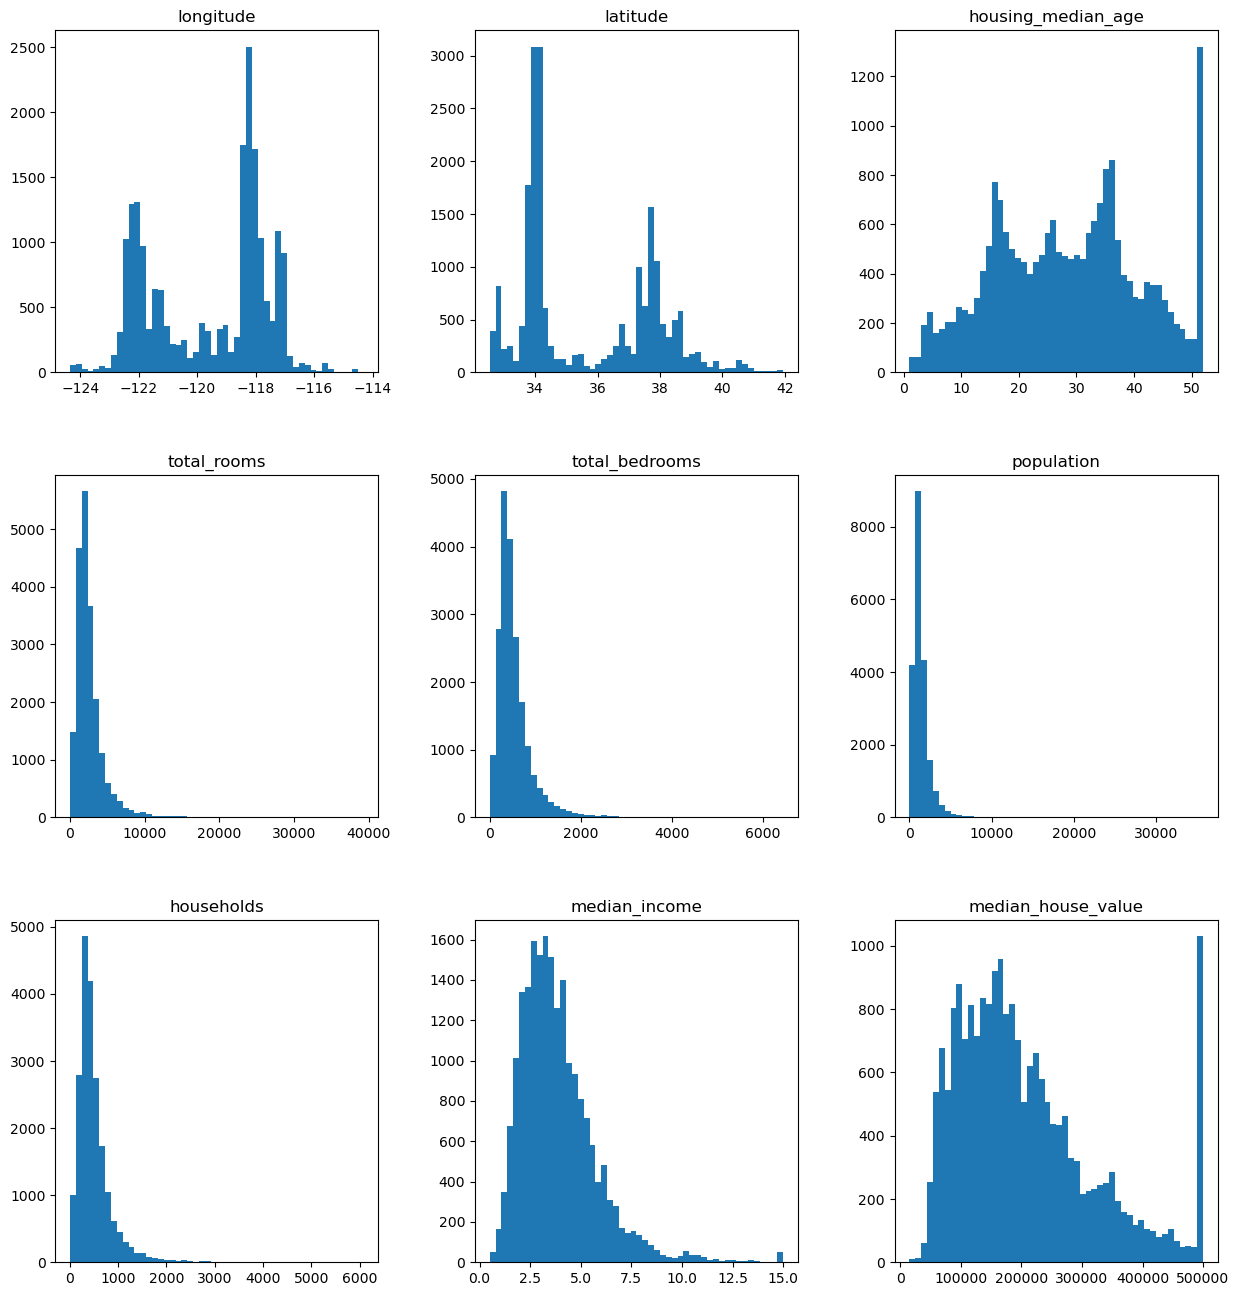

In [9]:
#Mostra o número de instâncias/linhas (eixo Y) que cada valor possui (eixo X)
housing.hist(bins = 50, figsize = (15, 16), grid = False);

1- "median_income" não está em formato de dólares americanos (USD), mas sim, categorizados com:
* 15: rendas medianas mais altas
* 0,5: rendas medianas mais baixas
* Os números representam as dezenas dos dólares. Por exemplo, 3 significa 30,000 mil dólares

2- "housing_median_age" e "median_house_value" foram limitadas. Temos muitas instâncias nos valores limites, como exemplo nosso rótudo de saída (y), "median_house_value", que possui mais de mil distritos com o valor de 500.000 USD, isso faz com que nosso modelo aprenda que os preços previstos nunca podem ultrapassar esse limite.

3- Os valores possuem escalas muito distantes umas das outras. Precisamos escalonar esses valores.

4- Os histogramas possuem uma "cauda" mais para a direita da mediana do que para esquerda. Isso pode levar ao algorítmo a ter um pouco mais de dificuldade em detectar padrões. Tentaremos transformar esses valores mais tarde para obter uma distribuição em um formato de sino

# Criando um conjunto de testes

O atributo "median_income" é muito importante para prever os preços médios de habitação. Queremos criar um atributo categórico contendo diversas categorias de rendas.

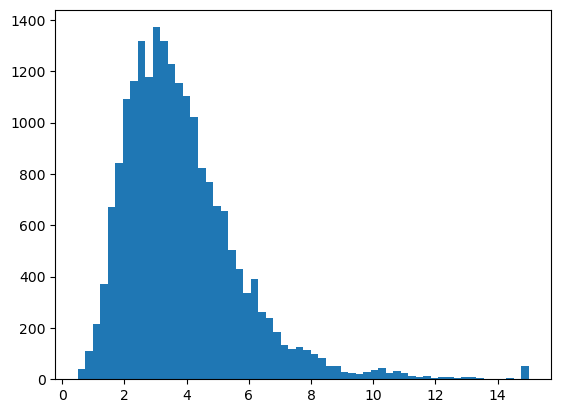

In [10]:
housing["median_income"].hist(bins = 60, grid = False);

Observando a dispersão do atributo "median_income", percebemos que a renda mediana está está entre 1,5 à 6 (15.000 USD e 60.000 USD). Vamos criar um atributo categórico que varia de 1 à 5 de acordo com a renda média

In [11]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

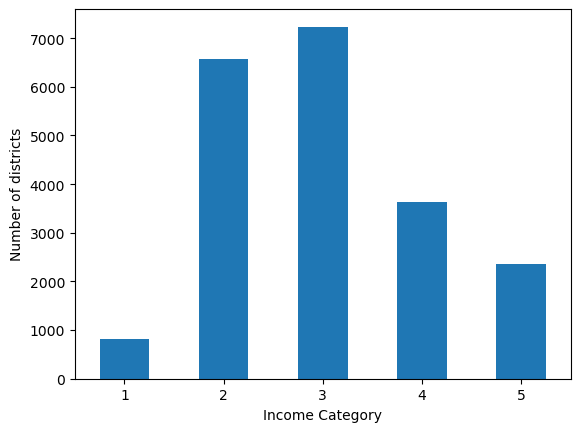

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0);
plt.xlabel("Income Category");
plt.ylabel("Number of districts");

Vamos fazer uma amostragem estratificada com base na categoria de renda

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [15]:
strat_train_set, strat_test_set = strat_splits[0]

In [16]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


* Nós também poderíamos passar a amostragem estratificada diretamente na função "train_test_split", pois iríamos obter praticamente omesmo resultado. Porém não seria tão flexivel: strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Depois que já organizamos os dados no processo de amostragem estratificada, podemos remover a coluna "income_cat"

In [18]:
strat_train_set = strat_train_set.drop("income_cat", axis=1)
strat_test_set = strat_test_set.drop("income_cat", axis=1)

# Visualizando os dados

Primeiro de tudo precisamos ter certeza que estamos utilizando SOMENTE os dados de treino, deixando totalmente de lado o conjunto de teste "pelo menos por enquanto".

In [19]:
housing = strat_train_set.copy()

In [20]:
housing.shape

(16512, 10)

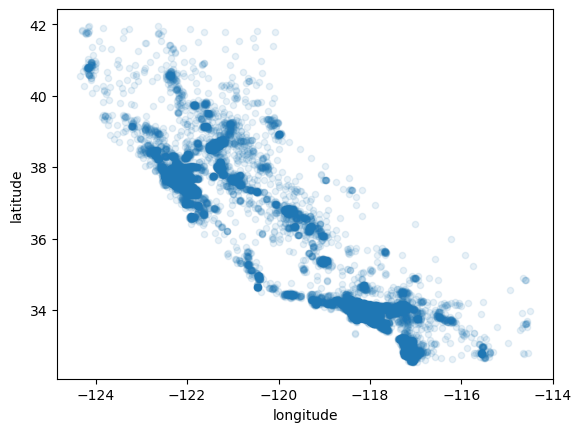

In [21]:
housing.plot(kind = "scatter", x= "longitude", y = "latitude", alpha = 0.1,);#alpha = 0.1: Diminui a transparência, dando destaque para os pontos com 
                                                                            #maior densidade

In [22]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

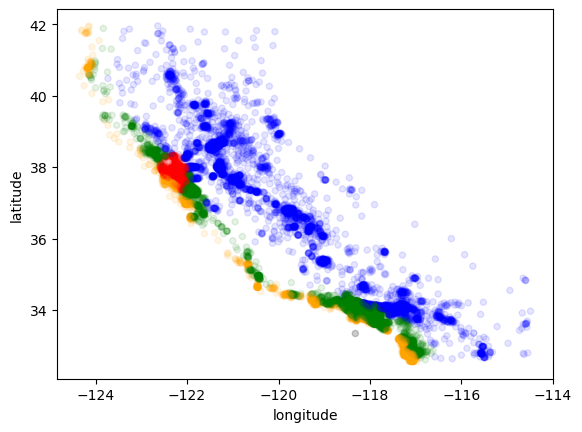

In [23]:
# Visualização de densidade das categorias
ocean_proximity_cat = {"NEAR BAY":"red", "<1H OCEAN":"green", "INLAND":"blue", "NEAR OCEAN":"orange", "ISLAND":"black"}
housing.plot(kind = "scatter", x = "longitude", y = "latitude", 
         color = housing["ocean_proximity"].apply(lambda x: ocean_proximity_cat[x]), alpha = 0.1);

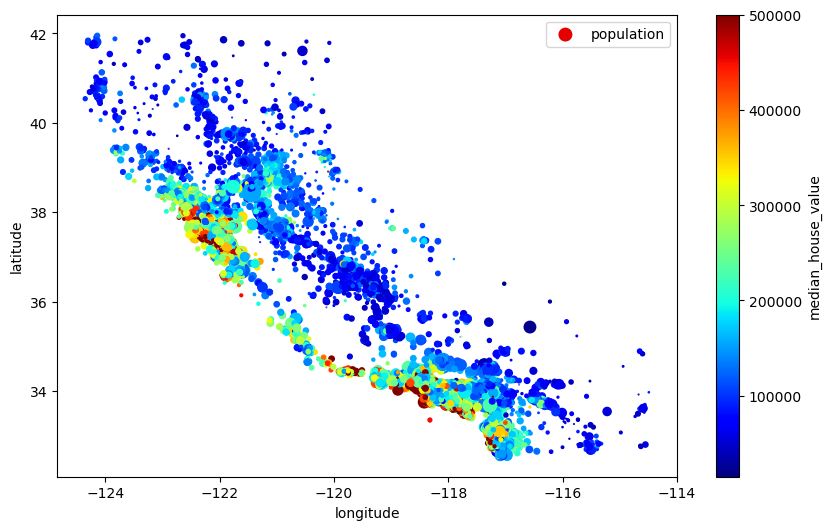

In [24]:
#Visualizar a relação entre a população que reside em uma determinada área com o preço
housing.plot(kind = "scatter", x = "longitude", y = "latitude",
            #s "size": controla o tamanho dos marcadores
            #Vamos dividir a população por 100 para mantermos a proporção e diminuir a escala
            s = housing["population"]/100, label = "population",
            #c "color": controla a cor dos marcadores - "jet": maior valor = mais quente, menor valor = mais frio
            c = "median_house_value", cmap = "jet", colorbar = True, figsize = (10, 6));

Ao analisar ambos os gráficos podemos ter um insight que:
* Há uma densidade muito maior nas áreas próximas ao oceano (NEAR OCEAN, <1H OCEAN, NEAR BAY). Isso influencia fortemente no valor, onde as casas próximas do oceano tendem a ter um preço muito maior que as outras
* A densidade populacional também está correlacionado com o preço das habitações

Provavelmente será útil utilizar um algoritmo de agrupamento para detectar e agrupar os atributos mais correlacionados

# Olhando para as correlações

In [25]:
corr_matrix = housing.corr(numeric_only = True)

In [26]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Vamos visualizar graficamente as relações existentes entre os atributos. Como temos muitos atributos (11), vou selecionar somente os que apresentam ser mais promissores, com maior correlação 

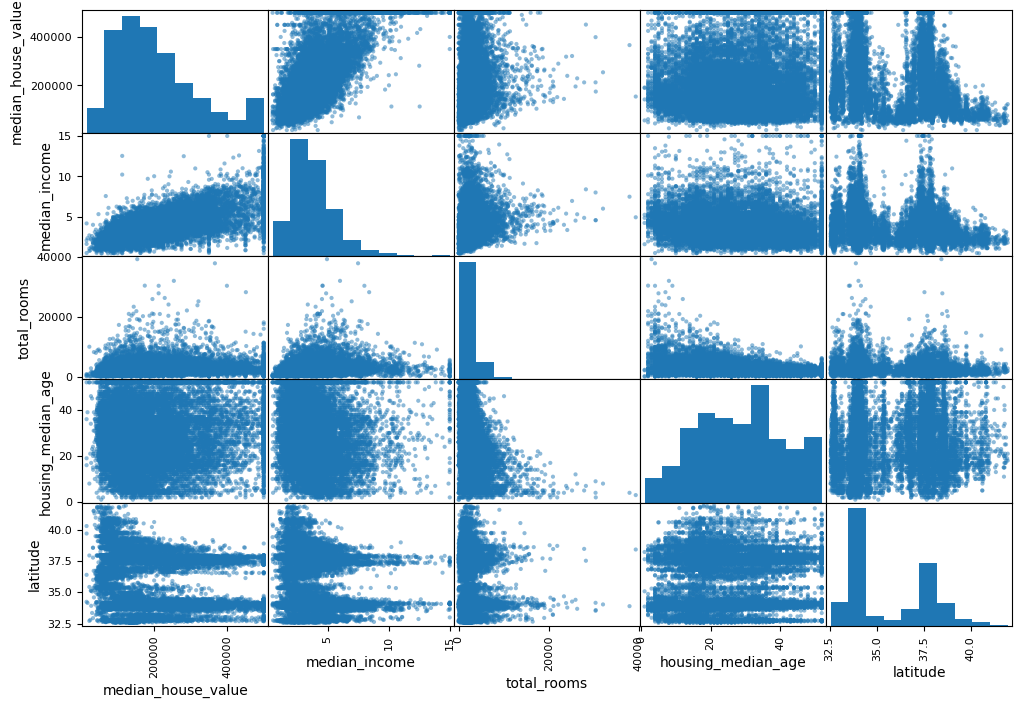

In [27]:
from pandas.plotting import scatter_matrix
atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(housing[atributes], figsize = (12, 8));

O atributo mais promissor é o "median_income", onde mostra uma boa correlação que quanto maior a renda média maior é o valor médio da casa. Vamos ampliar um pouco mais essa visualização

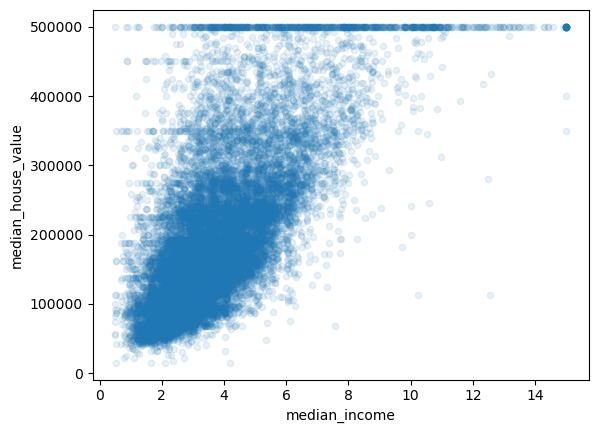

In [28]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1);

* Claramente ela possui uma correlação bem forte, podemos ver a tendência de aumento dos valores além dos pontos não estarem muito dispersos
* Também ficou visível o limite de valor de 500.000 USD apontado no início da análise

# Experimentando combinações de atributos

Antes de passarmos para a etapa de preparar os dados para o modelo, podemos tentar fazer várias combinações de atributos.

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


* Podemos querer saber o número de cômodos (total_rooms) por família (households)
* Ou também o número total de quartos (total_bedrooms) por cômodo

In [30]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

Vamos dar uma olhada na matriz de correlação novamente

In [31]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

O número total de quartos por cômodos (bedrooms_per_room) possui uma correlação muito mais forte do que o total de quartos (total_bedrooms) e o total de cômodos (total_rooms)

# Preparando os dados para o modelo

In [32]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


# Limpeza dos Dados

In [34]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [35]:
null_rows_index = housing.isnull().any(axis = 1) #Separamos os valores que possuem algum valor ausente
housing.loc[null_rows_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
18241,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
18493,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND


Temos a noção que a coluna "total_bedrooms" possui 168 dados ausentes. Dito isso, temos 3 opções para se fazer:
* 1- housing.dropna(subsets = ["total_bedrooms"], inplace = True) - Remover todas as linhas com dados ausentes
* 2- housing.drop("total_bedrooms", axis = 1) - Remover a coluna inteira
* median = housing["total_bedrooms"].median()
* 3- housing.fillna(median, inplace = True) - Preencher os valores ausentes com a mediana dos outros valores presentes (0, média, mediana)
* Se escolhermos a 3 opção, precisaremos salvar a mediana dos valores em uma variável para podermos substituir os valores ausentes do conjunto de testes também, além do fato de utilizarmos essa mesma mediana para preencher algum outro valor ausente que entrar no sistema quando ele estiver em funcionamento

O Scikit-Learn oferece uma classe muito útil para lidarmos com valores ausentes: SimpleImputer

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy = "median")

In [38]:
#A mediana só é possivel calcular com valores numéricos
housing_num = housing.select_dtypes(exclude = "object")
#O imputer irá calcular a mediana de todos os atributos e armazenar na sua instância statistics_
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [40]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [41]:
#Preencher os valores ausentes com a mediana calculada
X = imputer.transform(housing_num)

In [42]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [43]:
#A variável X está em formato de lista, vamos transforma-la em um Data Frame
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [44]:
housing_tr.loc[null_rows_index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


Podemos ver que os valores ausentes foram preenchidos pela mediana

<b><i>Tratamento de texto e atributos categóricos</i></b>

In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

<b><i> Pipeline</i></b>

Quando quisermos realizar o preprocessamento dos dados, em vez de reescrever todos os códigos de limpeza de dados, podemos criar um único pipeline juntando todas as estapas de preprocessamento

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin #Bibliotecas para criar nosso transformador personalizado

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #Números das colunas que queremos usar

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room=True): # Construtor que deixa o usuário decidir se quer seja criado a coluna bedrooms_per_room ou não
                                                #Isso nos possibilita testar novas colunas ou remove-las, podemos adicionar mais combinações para
                                                #Automatizar o processo de testes das colunas
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
#Estamos passando um argumento para o construtor para personalizar as intancias que criamos, deixando os testes mais flexíveis
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

#Quando pegamos a variável criada no código de cima e usamos o "transform", nós vamos utilizar o argumento do construtor e ativar a função "transform"
#onde carrega toda a lógica
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("standar", StandardScaler()),
    ("colunas", CombinedAttributesAdder())
])

pipeline_cat = Pipeline([
    ("encoder", OneHotEncoder())
])

from sklearn.compose import ColumnTransformer #Juntar os 2 pipelines (num, cat) em um único pipeline

#Separamos as colunas numéricas em uma variável, pois o transformador "SimpleImputer" só funciona com dados numéricos
housing_num = housing.select_dtypes(exclude = "object")
housing_cat = housing.select_dtypes(include = "object")

#Criar uma lista com os nomes das colunas do "housing_num"
num_atributes = list(housing_num)
cat_atributes = list(housing_cat)

full_pipeline = ColumnTransformer([
    #"nome", transformador, lista de nomes das colunas que devem ser transformadas
    ("num", pipeline_num, num_atributes),
    ("cat", pipeline_cat, cat_atributes)
])

#Se utilizamos a função "ColumnTransformer" e deixarmos de passar uma coluna, ela não será utilizada no DF final, será "removida"

<b><i>Agora temos um único pipeline que irá realizar o preprocessamento de forma mais profissional</i></b>

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

# Treinando e avaliando o modelo no conjunto de treinamento

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
#Fazer um teste de previsão com o conjunto de treinamento
some_data = housing.iloc[:5, :]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"Predictions: {lin_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [270808.01240921 334807.66656103 119843.11037935 109185.17612244
 305488.46106298]
Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68225.63558193452

Nosso modelo <b> não está performando bem nos dados de treinamentos,</b> isso nos diz que ele está com um problema de <b><i>Underfitting </i></b>

<b>Possíveis soluções para solucionar o problema de Underfitting:</b>
* Selecionar um modelo mais poderoso
* Adicionar mais features/colunas nos dados de treinamento
* Reduzir a penalidade das restrições (Nosso modelo não está regularizado, então podemos exluir essa opção)

<b><i>Antes de tentarmos criar mais colunas para os dados, vamos testar com um algorítimo mais poderoso</i></b>

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [57]:
house_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, house_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<b>Não temos nenhum erro,</b> isso nos mostra que nosso modelo não está tendo problema com Underfitting, mas precisamos conferir se agora não temos o problema de <b><i>Overfitting</i></b>

<b><i>Nós não queremos mexer no conjunto de testes até termos certeza que o modelo está confiável.</i></b> Então precisamos usar o conjunto de treinamento, onde uma parte será usada para o treinamento e outra parte para a validação

# Melhor avaliação usando a validação cruzada

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard deviation: {tree_rmse_scores.std()}")

<b><i>O score da validação cruzada recebem um valor de que (quanto maior melhor), sendo oposto de um RMSE convencional, que (quanto menor melhor) </i></b>

In [60]:
display_scores(tree_rmse_scores)

Scores: [67855.19173804 68989.2009625  67563.80320028 69516.69848532
 68140.27112808 70361.77935314 70671.35630235 75036.4278047
 69466.66763779 68309.60079161]
Mean: 69591.09974038189
Standard deviation: 2065.581059630923


In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [69814.0462415  67762.03367101 67271.39286668 69034.41258854
 67301.12661256 68774.44290661 67439.78288364 69956.96296851
 67522.80674892 68331.09830077]
Mean: 68320.8105788721
Standard deviation: 2065.581059630923


<b><i>O modelo de Decision Tree está com overfitting, pois ele possui um erro de 70067, 1237 maior que a Regressão Linear, que possui um erro de 68320 </b></i>

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18264.30745497213

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48907.80663825 50584.52068656 47401.51027432 50278.69613903
 48706.5426321  49570.37379134 48569.3689977  50187.82503593
 49717.63369726 49052.1372346 ]
Mean: 49297.641512708215
Standard deviation: 2065.581059630923


<b><i>O modelo de Random Forest ainda está com Overfitting, pois os dados de treinamento possuem um valor muito menor em comparação com os dados de validação da validação cruzada</i></b>.
<br><br>Possíveis soluções para corrigir esse problema:
* Simplificar o modelo
* Regularizar
* Obter mais dados de treinamento

Quando você suspeita que um modelo está sofrendo de overfitting, é uma boa prática primeiro explorar outras opções de algoritmos antes de investir tempo ajustando os parâmetros do modelo atual. O objetivo é selecionar alguns (dois a cinco) modelos promissores.

# Ajuste seu modelo


Vamos supor que agora você tenha uma lista de modelos promissores. Agora você precisa 
ajustá-los. Vejamos algumas maneiras de fazer isso.

<b><i>GridSearchCV</i></b>

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators":[3, 10, 30, 40, 50], "max_features":[2, 4, 6, 8, 10]},
              {"bootstrap":[False], "n_estimators":[3, 10, 30, 40, 50], "max_features":[2, 3, 4, 6, 8]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66867.39088642213 {'max_features': 2, 'n_estimators': 3}
56767.05482349563 {'max_features': 2, 'n_estimators': 10}
54448.68627699825 {'max_features': 2, 'n_estimators': 30}
53780.401607177446 {'max_features': 2, 'n_estimators': 40}
53850.40667543382 {'max_features': 2, 'n_estimators': 50}
61553.594658681046 {'max_features': 4, 'n_estimators': 3}
54251.754716000265 {'max_features': 4, 'n_estimators': 10}
51456.15627909316 {'max_features': 4, 'n_estimators': 30}
50977.8502294577 {'max_features': 4, 'n_estimators': 40}
50765.728093111844 {'max_features': 4, 'n_estimators': 50}
60306.05899162502 {'max_features': 6, 'n_estimators': 3}
52506.73090509374 {'max_features': 6, 'n_estimators': 10}
50314.43219859318 {'max_features': 6, 'n_estimators': 30}
49850.84385188277 {'max_features': 6, 'n_estimators': 40}
49608.2619643618 {'max_features': 6, 'n_estimators': 50}
58477.214643045394 {'max_features': 8, 'n_estimators': 3}
51055.64665970812 {'max_features': 8, 'n_estimators': 10}
49873.798315174